In [11]:
import os
import cv2  # OpenCV for image processing
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

# Data Augmentation Part

In [14]:
# Paths
main_input_dir = r"C:\Users\lenovo\Projects\Facial_Detection\Data\Original_Dataset" # Path to main dataset folder
main_output_dir = r"C:\Users\lenovo\Projects\Facial_Detection\Data\Augmented_Dataset"  # Path to save augmented dataset

# Create output directory if it doesn't exist
os.makedirs(main_output_dir, exist_ok=True)

# Define augmentation functions
def preprocess_image(img, size=(200, 200)):
    resized = cv2.resize(img, size, interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    return resized, gray

def flip_image(img):
    return cv2.flip(img, 1)

def rotate_image(img, angle=45):
    rows, cols = img.shape[:2]
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    return cv2.warpAffine(img, M, (cols, rows))

def adjust_brightness(img, brightness=50):
    return cv2.convertScaleAbs(img, alpha=1, beta=brightness)

# Loop through subdirectories
for sub_dir in os.listdir(main_input_dir):
    input_dir = os.path.join(main_input_dir, sub_dir)

    # Skip non-directories
    if not os.path.isdir(input_dir):
        continue

    # Create a corresponding output directory
    output_dir = os.path.join(main_output_dir, sub_dir)
    os.makedirs(output_dir, exist_ok=True)

    # Get all image paths in the subdirectory
    image_paths = glob(os.path.join(input_dir, '*.jpg'))

    for idx, img_path in enumerate(image_paths):
        # Load the image
        img = cv2.imread(img_path)
        if img is None:
            print(f"Error loading image: {img_path}")
            continue

        # Apply augmentations
        resized, gray = preprocess_image(img)
        flipped = flip_image(resized)
        rotated = rotate_image(resized)
        brightened = adjust_brightness(resized)

        # Save augmented images
        base_name = os.path.splitext(os.path.basename(img_path))[0]
        cv2.imwrite(os.path.join(output_dir, f"{base_name}_resized.jpg"), resized)
        cv2.imwrite(os.path.join(output_dir, f"{base_name}_gray.jpg"), gray)
        cv2.imwrite(os.path.join(output_dir, f"{base_name}_flipped.jpg"), flipped)
        cv2.imwrite(os.path.join(output_dir, f"{base_name}_rotated.jpg"), rotated)
        cv2.imwrite(os.path.join(output_dir, f"{base_name}_brightened.jpg"), brightened)

        print(f"Processed {idx + 1}/{len(image_paths)} in {sub_dir}: {base_name}")

print("Data Augmentation Completed!")

Processed 1/300 in Akshay Kumar: 0431d318ef9d8a960c91e6f323f0f971
Processed 2/300 in Akshay Kumar: 055ebbda79d7f58f5ff895030c2945ec
Processed 3/300 in Akshay Kumar: 05aecc2317
Processed 4/300 in Akshay Kumar: 0a0df79221b794470d2e416986ca812d
Processed 5/300 in Akshay Kumar: 0d5e3950ba
Processed 6/300 in Akshay Kumar: 0d6a9769b2
Processed 7/300 in Akshay Kumar: 0da088875998ec122f89650f8402b6cc
Processed 8/300 in Akshay Kumar: 0f67ff3d3b
Processed 9/300 in Akshay Kumar: 1
Processed 10/300 in Akshay Kumar: 10
Processed 11/300 in Akshay Kumar: 100
Processed 12/300 in Akshay Kumar: 101
Processed 13/300 in Akshay Kumar: 102
Processed 14/300 in Akshay Kumar: 103
Processed 15/300 in Akshay Kumar: 104
Processed 16/300 in Akshay Kumar: 105
Processed 17/300 in Akshay Kumar: 106
Processed 18/300 in Akshay Kumar: 107
Processed 19/300 in Akshay Kumar: 108
Processed 20/300 in Akshay Kumar: 109
Processed 21/300 in Akshay Kumar: 11
Processed 22/300 in Akshay Kumar: 110
Processed 23/300 in Akshay Kumar:

**Build the Model**

# 80% train, 10% validation, 10% test

In [20]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Input and output paths

input_folder = r"C:\Users\lenovo\Projects\Facial_Detection\Data\Augmented_Dataset"  # Path to the original dataset
output_folder = r"C:\Users\lenovo\Projects\Facial_Detection\Data\Splited_Dataset"  # Path to the split dataset

os.makedirs(output_folder, exist_ok=True)

# Create train, validation, and test folders
os.makedirs(f"{output_folder}/train", exist_ok=True)
os.makedirs(f"{output_folder}/validation", exist_ok=True)
os.makedirs(f"{output_folder}/test", exist_ok=True)

# Get all class folders
class_folders = [folder for folder in os.listdir(input_folder) if os.path.isdir(os.path.join(input_folder, folder))]

# Split each class into train, validation, and test sets
for class_name in class_folders:
    class_path = os.path.join(input_folder, class_name)
    images = os.listdir(class_path)

    #split data in ratio of 80%, 10%, 10%
    train, test_val = train_test_split(images, test_size=0.20, random_state=42)
    test, val = train_test_split(test_val, test_size=0.50, random_state=42)

    # Create class subdirectories in output folders
    os.makedirs(f"{output_folder}/train/{class_name}", exist_ok=True)
    os.makedirs(f"{output_folder}/validation/{class_name}", exist_ok=True)
    os.makedirs(f"{output_folder}/test/{class_name}", exist_ok=True)

    # Move images to their respective folders
    for img in train:
        shutil.move(os.path.join(class_path, img), f"{output_folder}/train/{class_name}/{img}")
    for img in val:
        shutil.move(os.path.join(class_path, img), f"{output_folder}/validation/{class_name}/{img}")
    for img in test:
        shutil.move(os.path.join(class_path, img), f"{output_folder}/test/{class_name}/{img}")

print("Dataset successfully split into train, validation, and test sets!")


Dataset successfully split into train, validation, and test sets!


**check if it divided correctly or not**

In [23]:
import os

# Function to count images in a folder
def count_images(folder_path):
    counts = {class_name: len(os.listdir(os.path.join(folder_path, class_name))) for class_name in os.listdir(folder_path)}
    return counts

print("Train distribution:", count_images(f"{output_folder}/train"))
print("Validation distribution:", count_images(f"{output_folder}/validation"))
print("Test distribution:", count_images(f"{output_folder}/test"))

Train distribution: {'Akshay Kumar': 1200, 'Amitabh Bachchan': 904, 'Prabhas': 1164, 'vijay': 1344}
Validation distribution: {'Akshay Kumar': 150, 'Amitabh Bachchan': 113, 'Prabhas': 146, 'vijay': 168}
Test distribution: {'Akshay Kumar': 150, 'Amitabh Bachchan': 113, 'Prabhas': 145, 'vijay': 168}


Found 4612 files belonging to 4 classes.
['Akshay Kumar', 'Amitabh Bachchan', 'Prabhas', 'vijay']
Found 577 files belonging to 4 classes.
Found 576 files belonging to 4 classes.
Data prepared successfully!


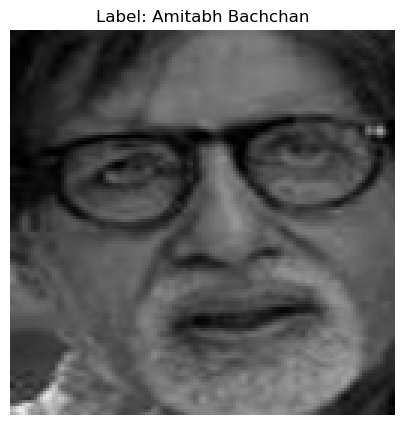

In [25]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Define paths to datasets
train_dir = r"C:\Users\lenovo\Projects\Facial_Detection\Data\Splited_Dataset\train"
val_dir = r"C:\Users\lenovo\Projects\Facial_Detection\Data\Splited_Dataset\validation"
test_dir = r"C:\Users\lenovo\Projects\Facial_Detection\Data\Splited_Dataset\test"

# Define image properties
image_size = (128, 128)  # Resize images
batch_size = 16

# Create data loaders
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=image_size,
    batch_size=batch_size
)
class_names = train_dataset.class_names
print(train_dataset.class_names)


val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=image_size,
    batch_size=batch_size
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=image_size,
    batch_size=batch_size
)

# Normalize the datasets
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

print("Data prepared successfully!")

# Display one image from the train_dataset with class name
for images, labels in train_dataset.take(1):  # Take one batch
    plt.figure(figsize=(5, 5))
    plt.imshow(images[0].numpy())  # Show the first image in the batch
    class_name = class_names[labels[0].numpy()]  # Get the class name
    plt.title(f"Label: {class_name}")  # Display class name
    plt.axis('off')
    plt.show()





In [27]:
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(11, activation='softmax')  # Adjust number of classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())


C:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │           1,419 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,306,059 (12.61 MB)

 Trainable params: 3,306,059 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

None


# model fiting

In [30]:
hist = model.fit(
    train_dataset,
    validation_data=val_dataset,
    batch_size=16,
    epochs=10
)

Epoch 1/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 45s 150ms/step - accuracy: 0.3319 - loss: 1.4455 - val_accuracy: 0.6395 - val_loss: 0.9445
Epoch 2/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 41s 141ms/step - accuracy: 0.6578 - loss: 0.9227 - val_accuracy: 0.7002 - val_loss: 0.7997
Epoch 3/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 41s 141ms/step - accuracy: 0.7924 - loss: 0.5912 - val_accuracy: 0.7591 - val_loss: 0.6762
Epoch 4/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 41s 141ms/step - accuracy: 0.8957 - loss: 0.3024 - val_accuracy: 0.8440 - val_loss: 0.6810
Epoch 5/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 41s 142ms/step - accuracy: 0.9601 - loss: 0.1207 - val_accuracy: 0.8232 - val_loss: 0.8578
Epoch 6/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 41s 141ms/step - accuracy: 0.9711 - loss: 0.0866 - val_accuracy: 0.8544 - val_loss: 0.7946
Epoch 7/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 41s 142ms/step - accuracy: 0.9866 - loss: 0.0443 - val_accuracy: 0.8371 - val_loss: 0.8945
Epoch 8/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 40s 140ms/step - accuracy: 0.9849 - loss: 0

In [48]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy*100}")

36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.8485 - loss: 1.3552
Test Loss: 1.2298240661621094, Test Accuracy: 84.375


In [39]:
model.save(r"C:\Users\lenovo\Projects\Facial_Detection\models/model.keras")

# model evaluation

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


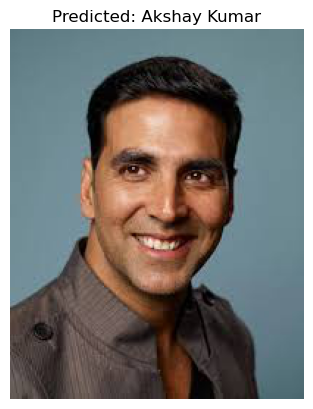

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


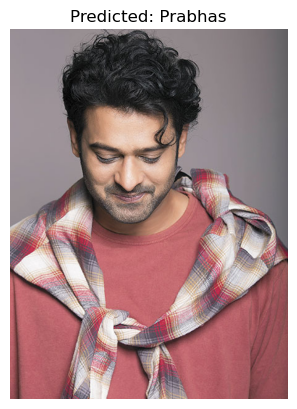

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


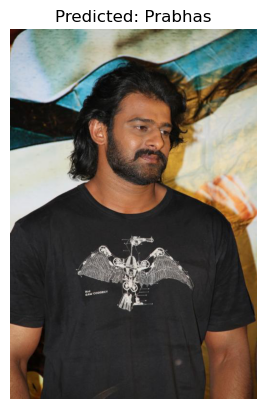

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


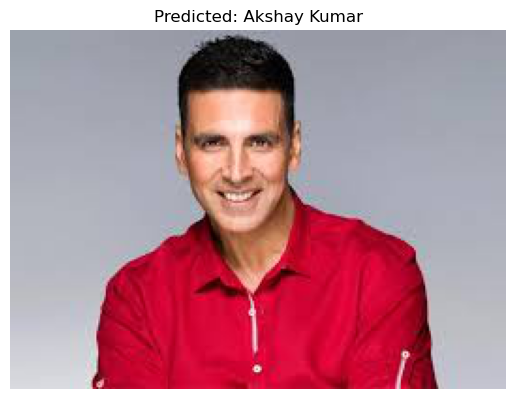

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


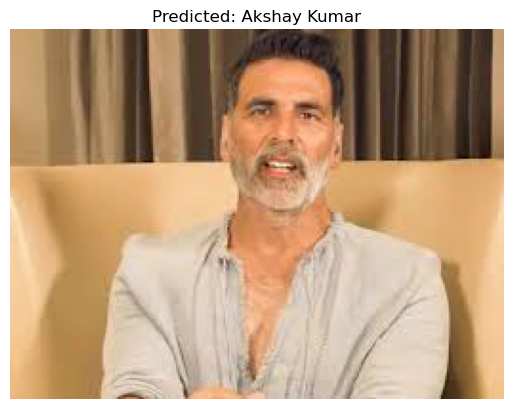

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


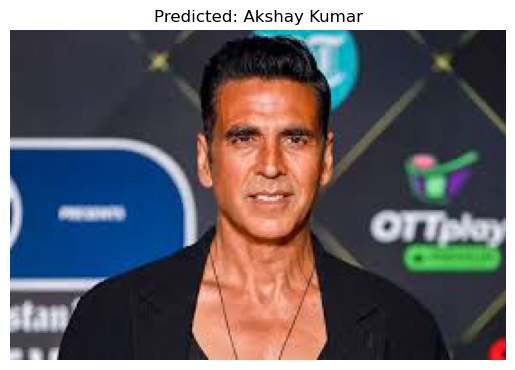

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


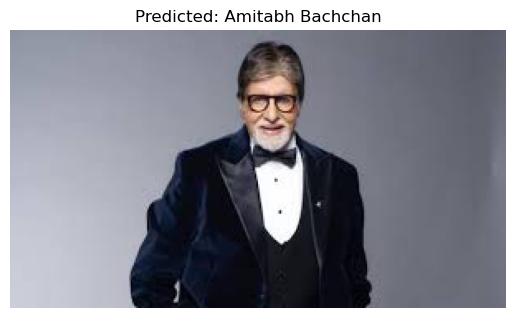

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


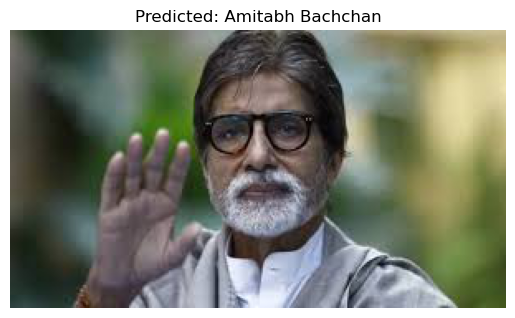

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


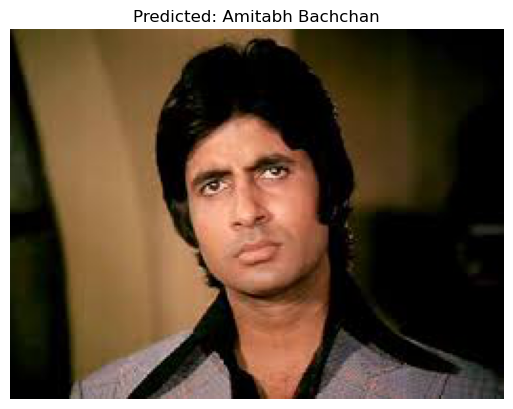

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


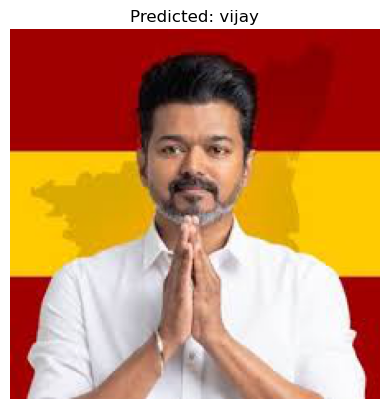

In [62]:
import tensorflow as tf
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import os

# Load the saved model
model = tf.keras.models.load_model("C:/Users/lenovo/Projects/Facial_Detection/models/model.keras")

# Define class names (replace with your class names)
# class_names = ['Amitabh Bachchan','vijay','Prabhas','Akshay Kumar']
class_names = ['Akshay Kumar', 'Amitabh Bachchan', 'Prabhas', 'vijay']

def preprocess_image(image_path):
    """
    Preprocess the unseen image to match the model's input requirements.
    """
    # Load the image
    image = Image.open(image_path)
    # Resize to the model's input size (128x128)
    image = image.resize((128, 128))
    # Convert to a numpy array
    image_array = np.array(image)
    # Normalize the pixel values to [0, 1]
    image_array = image_array / 255.0
    # Add a batch dimension
    image_array = np.expand_dims(image_array, axis=0)
    return image_array

def test_multiple_images(image_paths):
    """
    Test multiple unseen images and display the predictions.
    """
    for image_path in image_paths:
        # Preprocess the image
        input_image = preprocess_image(image_path)

        # Predict using the model
        predictions = model.predict(input_image)

        # Get the predicted class
        predicted_class_index = np.argmax(predictions)
        predicted_class_name = class_names[predicted_class_index]

        # Display the image with the prediction
        plt.figure()
        plt.imshow(Image.open(image_path))
        plt.title(f"Predicted: {predicted_class_name}")
        plt.axis('off')
        plt.show()

# Directory containing the test images
image_directory = r"C:\Users\lenovo\Projects\Facial_Detection\Data\unseen_Dataset"  # Replace with the directory path containing your images

# Get a list of image paths
image_paths = [os.path.join(image_directory, img) for img in os.listdir(image_directory)[:10]]  # Limit to 10 images

# Test and display results
test_multiple_images(image_paths)
